In [1]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My\ Drive/Colab_Notebooks

Mounted at /content/drive/
/content/drive/My Drive/Colab_Notebooks


In [2]:
%cd coursera-deep-learning-specialization-master/C5\ -\ Sequence\ Models/Week\ 2/Emojify

/content/drive/My Drive/Colab_Notebooks/coursera-deep-learning-specialization-master/C5 - Sequence Models/Week 2/Emojify


In [7]:
%tensorflow_version 1.x

In [8]:
pip install emoji

     |████████████████████████████████| 184 kB 28.0 MB/s 
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186469 sha256=493fbbc7a36a09edaf18c0f2470d9bc1af3c22f213ab3fc3d62e724c3cc8e57f
  Stored in directory: /root/.cache/pip/wheels/e4/61/e7/2fc1ac8f306848fc66c6c013ab511f0a39ef4b1825b11363b2
Successfully built emoji


In [9]:
import numpy as np
import emoji
from emo_utils import *
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
X_train, Y_train = read_csv('data/train_emoji.csv')
X_test, Y_test = read_csv('data/tesss.csv')

In [11]:
maxLen = len(max(X_train, key=len).split())

In [17]:
index = 1
print(X_train[index], label_to_emoji(Y_train[index]))

I am proud of your achievements 😄


In [18]:
Y_oh_train = convert_to_one_hot(Y_train, C = 5)
Y_oh_test = convert_to_one_hot(Y_test, C = 5)

In [19]:
index = 50
print(Y_train[index], "is converted into one hot", Y_oh_train[index])

0 is converted into one hot [1. 0. 0. 0. 0.]


In [21]:
word_to_index, index_to_word, word_to_vec_map = read_glove_vecs('data/glove.6B.50d.txt')

In [22]:
word = "cucumber"
index = 289846
print("the index of", word, "in the vocabulary is", word_to_index[word])
print("the", str(index) + "th word in the vocabulary is", index_to_word[index])

the index of cucumber in the vocabulary is 113317
the 289846th word in the vocabulary is potatos


In [25]:
def sentence_to_avg(sentence, word_to_vec_map):
  
  sentence = sentence.lower()
  words = sentence.split()

  avg = np.zeros(np.shape(word_to_vec_map[words[0]]))

  for w in words:
    avg += word_to_vec_map[w]
  
  avg = avg / len(words)

  return avg

In [26]:
avg = sentence_to_avg("Morrocan couscous is my favorite dish", word_to_vec_map)
print("avg = ", avg)

avg =  [-0.008005    0.56370833 -0.50427333  0.258865    0.55131103  0.03104983
 -0.21013718  0.16893933 -0.09590267  0.141784   -0.15708967  0.18525867
  0.6495785   0.38371117  0.21102167  0.11301667  0.02613967  0.26037767
  0.05820667 -0.01578167 -0.12078833 -0.02471267  0.4128455   0.5152061
  0.38756167 -0.898661   -0.535145    0.33501167  0.68806933 -0.2156265
  1.797155    0.10476933 -0.36775333  0.750785    0.10282583  0.348925
 -0.27262833  0.66768    -0.10706167 -0.283635    0.59580117  0.28747333
 -0.3366635   0.23393817  0.34349183  0.178405    0.1166155  -0.076433
  0.1445417   0.09808667]


In [36]:
def model(X, Y, word_to_vec_map, learning_rate = 0.01, num_iterations = 400):

  np.random.seed(1)

  m = Y.shape[0]
  n_y = 5
  n_h = 50

  W = np.random.rand(n_y,n_h) / np.sqrt(n_h)
  b = np.zeros((n_y,))

  Y_oh = convert_to_one_hot(Y, C = n_y)

  for t in range(num_iterations):
    for i in range(m):
      
      avg = sentence_to_avg(X[i], word_to_vec_map)

      zi = np.dot(W, avg) + b
      ai = softmax(zi)
      cost = - np.sum(np.multiply(Y_oh[i], np.log(ai)))

      dz = ai - Y_oh[i]
      dW = np.dot(dz.reshape(n_y,1), avg.reshape(1, n_h))
      db = dz

      W = W - learning_rate * dW
      b = b - learning_rate * db

      if t % 100 == 0:
        print("Epoch: " + str(t) + " --- cost = " + str(cost))
        pred = predict(X, Y, W, b, word_to_vec_map)

  return pred, W, b

In [37]:
print(X_train.shape)
print(Y_train.shape)
print(np.eye(5)[Y_train.reshape(-1)].shape)
print(X_train[0])
print(type(X_train))
Y = np.asarray([5,0,0,5, 4, 4, 4, 6, 6, 4, 1, 1, 5, 6, 6, 3, 6, 3, 4, 4])
print(Y.shape)

X = np.asarray(['I am going to the bar tonight', 'I love you', 'miss you my dear',
 'Lets go party and drinks','Congrats on the new job','Congratulations',
 'I am so happy for you', 'Why are you feeling bad', 'What is wrong with you',
 'You totally deserve this prize', 'Let us go play football',
 'Are you down for football this afternoon', 'Work hard play harder',
 'It is suprising how people can be dumb sometimes',
 'I am very disappointed','It is the best day in my life',
 'I think I will end up alone','My life is so boring','Good job',
 'Great so awesome'])

print(X.shape)
print(np.eye(5)[Y_train.reshape(-1)].shape)
print(type(X_train))

(132,)
(132,)
(132, 5)
never talk to me again
<class 'numpy.ndarray'>
(20,)
(20,)
(132, 5)
<class 'numpy.ndarray'>


In [38]:
pred, W, b = model(X_train, Y_train, word_to_vec_map)
print(pred)

Epoch: 0 --- cost = 1.6325266598703185
Accuracy: 0.2196969696969697
Epoch: 0 --- cost = 1.5442480526558218
Accuracy: 0.24242424242424243
Epoch: 0 --- cost = 1.4816487675456147
Accuracy: 0.26515151515151514
Epoch: 0 --- cost = 1.966869061344784
Accuracy: 0.26515151515151514
Epoch: 0 --- cost = 1.6686655595279323
Accuracy: 0.2727272727272727
Epoch: 0 --- cost = 1.6963178298925965
Accuracy: 0.25757575757575757
Epoch: 0 --- cost = 1.571395692210273
Accuracy: 0.2803030303030303
Epoch: 0 --- cost = 1.4905094297275274
Accuracy: 0.26515151515151514
Epoch: 0 --- cost = 1.4898956483115666
Accuracy: 0.2878787878787879
Epoch: 0 --- cost = 1.721130242067992
Accuracy: 0.29545454545454547
Epoch: 0 --- cost = 1.31511515631959
Accuracy: 0.2803030303030303
Epoch: 0 --- cost = 1.3667353872499155
Accuracy: 0.2803030303030303
Epoch: 0 --- cost = 1.6864678492198952
Accuracy: 0.2878787878787879
Epoch: 0 --- cost = 1.4029645648112925
Accuracy: 0.2878787878787879
Epoch: 0 --- cost = 1.6625373672693673
Accuracy

In [41]:
print("Training set:")
pred_train = predict(X_train, Y_train, W, b, word_to_vec_map)
print('Test set:')
pred_test = predict(X_test, Y_test, W, b, word_to_vec_map)

Training set:
Accuracy: 0.9772727272727273
Test set:
Accuracy: 0.8928571428571429


In [42]:
X_my_sentences = np.array(["i adore you", "i love you", "funny lol", "lets play with a ball", "food is ready", "not feeling happy"])
Y_my_labels = np.array([[0], [0], [2], [1], [4],[3]])

pred = predict(X_my_sentences, Y_my_labels , W, b, word_to_vec_map)
print_predictions(X_my_sentences, pred)

Accuracy: 0.8333333333333334

i adore you ❤️
i love you ❤️
funny lol 😄
lets play with a ball ⚾
food is ready 🍴
not feeling happy 😄


(56,)
           ❤️    ⚾    😄    😞   🍴
Predicted  0.0  1.0  2.0  3.0  4.0  All
Actual                                 
0            6    0    0    1    0    7
1            0    8    0    0    0    8
2            1    0   17    0    0   18
3            1    1    2   12    0   16
4            0    0    0    0    7    7
All          8    9   19   13    7   56


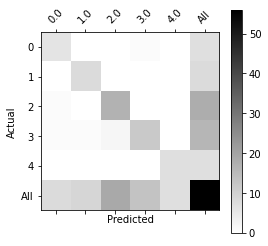

In [43]:
print(Y_test.shape)
print('           '+ label_to_emoji(0)+ '    ' + label_to_emoji(1) + '    ' +  label_to_emoji(2)+ '    ' + label_to_emoji(3)+'   ' + label_to_emoji(4))
print(pd.crosstab(Y_test, pred_test.reshape(56,), rownames=['Actual'], colnames=['Predicted'], margins=True))
plot_confusion_matrix(Y_test, pred_test)

In [44]:
import numpy as np
np.random.seed(0)
from keras.models import Model
from keras.layers import Dense, Input, Dropout, LSTM, Activation
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.initializers import glorot_uniform
np.random.seed(1)

Using TensorFlow backend.


In [49]:
def sentences_to_indices(X, word_to_index, max_len):

  m = X.shape[0]
  X_indices = np.zeros((m, max_len))

  for i in range(m):
    words = X[i].lower().split()
    j=0

    for word in words:
      X_indices[i,j] = (word_to_index[word])
      j += 1

  return X_indices

In [50]:
X1 = np.array(["funny lol", "lets play baseball", "food is ready for you"])
X1_indices = sentences_to_indices(X1,word_to_index, max_len = 5)
print("X1 =", X1)
print("X1_indices =", X1_indices)

X1 = ['funny lol' 'lets play baseball' 'food is ready for you']
X1_indices = [[155345. 225122.      0.      0.      0.]
 [220930. 286375.  69714.      0.      0.]
 [151204. 192973. 302254. 151349. 394475.]]


In [51]:
def pretrained_embedding_layer(word_to_vec_map, word_to_index):

  vocab_len = len(word_to_index) + 1                  # adding 1 to fit Keras embedding (requirement)
  emb_dim = word_to_vec_map["cucumber"].shape[0]      # define dimensionality of your GloVe word vectors (= 50)
  
  emb_matrix = np.zeros((vocab_len, emb_dim))

  for word, index in word_to_index.items():
    emb_matrix[index, :] = word_to_vec_map[word]

  embedding_layer = Embedding(input_dim=vocab_len, output_dim=emb_dim, trainable=False)
  embedding_layer.build((None,))
  embedding_layer.set_weights([emb_matrix])

  return embedding_layer

In [53]:
embedding_layer = pretrained_embedding_layer(word_to_vec_map, word_to_index)
print("weights[0][1][3] =", embedding_layer.get_weights()[0][1][3])

weights[0][1][3] = -0.3403


In [57]:
def Emojify_V2(input_shape, word_to_vec_map, word_to_index):

  sentence_indices = Input(input_shape, dtype='int32')
  embedding_layer = pretrained_embedding_layer(word_to_vec_map, word_to_index)
  embeddings = embedding_layer(sentence_indices)
  X = LSTM(128, return_sequences='True')(embeddings)
  X = Dropout(0.5)(X)
  X = LSTM(128)(X)
  X = Dropout(0.5)(X)
  X = Dense(5)(X)
  X = Activation('softmax')(X)

  model = Model(input = [sentence_indices], output = X)

  return model

In [58]:
model = Emojify_V2((maxLen,), word_to_vec_map, word_to_index)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 10)                0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 10, 50)            20000050  
_________________________________________________________________
lstm_3 (LSTM)                (None, 10, 128)           91648     
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 128)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 645 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("ac...)`
  del sys.path[0]


In [59]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [60]:
X_train_indices = sentences_to_indices(X_train, word_to_index, maxLen)
Y_train_oh = convert_to_one_hot(Y_train, C = 5)

In [61]:
model.fit(X_train_indices, Y_train_oh, epochs = 50, batch_size = 32, shuffle=True)


Epoch 1/50
132/132 [==============================] - 1s 8ms/step - loss: 1.5862 - accuracy: 0.2727
Epoch 2/50
132/132 [==============================] - 0s 1ms/step - loss: 1.5277 - accuracy: 0.3106
Epoch 3/50
132/132 [==============================] - 0s 1ms/step - loss: 1.4465 - accuracy: 0.4167
Epoch 4/50
132/132 [==============================] - 0s 1ms/step - loss: 1.4058 - accuracy: 0.4394
Epoch 5/50
132/132 [==============================] - 0s 1ms/step - loss: 1.3152 - accuracy: 0.5227
Epoch 6/50
132/132 [==============================] - 0s 1ms/step - loss: 1.1563 - accuracy: 0.5833
Epoch 7/50
132/132 [==============================] - 0s 1ms/step - loss: 1.0706 - accuracy: 0.5758
Epoch 8/50
132/132 [==============================] - 0s 1ms/step - loss: 0.8970 - accuracy: 0.6515
Epoch 9/50
132/132 [==============================] - 0s 1ms/step - loss: 0.8956 - accuracy: 0.6742
Epoch 10/50
132/132 [==============================] - 0s 1ms/step - loss: 0.7066 - accuracy: 0.757

In [62]:
X_test_indices = sentences_to_indices(X_test, word_to_index, max_len = maxLen)
Y_test_oh = convert_to_one_hot(Y_test, C = 5)
loss, acc = model.evaluate(X_test_indices, Y_test_oh)
print()
print("Test accuracy = ", acc)

56/56 [==============================] - 0s 3ms/step

Test accuracy =  0.8571428656578064


In [63]:
# This code allows you to see the mislabelled examples
C = 5
y_test_oh = np.eye(C)[Y_test.reshape(-1)]
X_test_indices = sentences_to_indices(X_test, word_to_index, maxLen)
pred = model.predict(X_test_indices)
for i in range(len(X_test)):
    x = X_test_indices
    num = np.argmax(pred[i])
    if(num != Y_test[i]):
        print('Expected emoji:'+ label_to_emoji(Y_test[i]) + ' prediction: '+ X_test[i] + label_to_emoji(num).strip())

Expected emoji:😄 prediction: she got me a nice present	❤️
Expected emoji:😞 prediction: work is hard	😄
Expected emoji:😞 prediction: This girl is messing with me	❤️
Expected emoji:😞 prediction: work is horrible	😄
Expected emoji:❤️ prediction: I love taking breaks	😞
Expected emoji:😞 prediction: she is a bully	❤️
Expected emoji:😞 prediction: go away	⚾
Expected emoji:😞 prediction: yesterday we lost again	⚾


In [65]:
x_test = np.array(['need to do lot of work'])
X_test_indices = sentences_to_indices(x_test, word_to_index, maxLen)
print(x_test[0] +' '+  label_to_emoji(np.argmax(model.predict(X_test_indices))))

need to do lot of work 😞
